In [2]:
import pandas as pd

In [3]:
churn = pd.read_csv("Churn_Modelling.csv")

In [4]:
churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#!pip install seaborn

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt #or from matplotlib import pyplot as plt

<Axes: xlabel='Age', ylabel='CreditScore'>

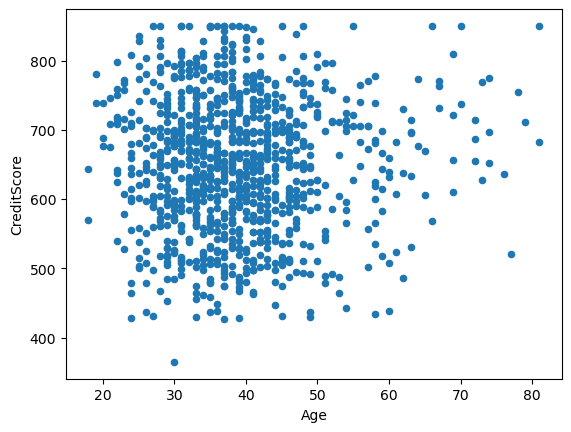

In [8]:
#churn.plot.scatter(x = "Age", y = "CreditScore")
churn.sample(1000).plot.scatter(x = "Age", y = "CreditScore")

Text(0, 0.5, 'CreditScore')

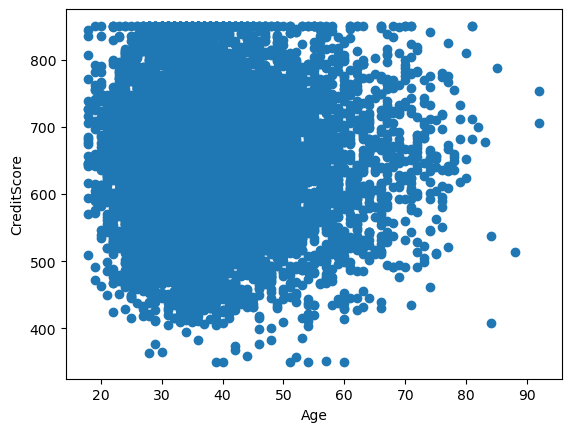

In [9]:
plt.scatter(x = churn["Age"], y = churn["CreditScore"])
plt.xlabel("Age")
plt.ylabel("CreditScore")

<Axes: xlabel='Age', ylabel='CreditScore'>

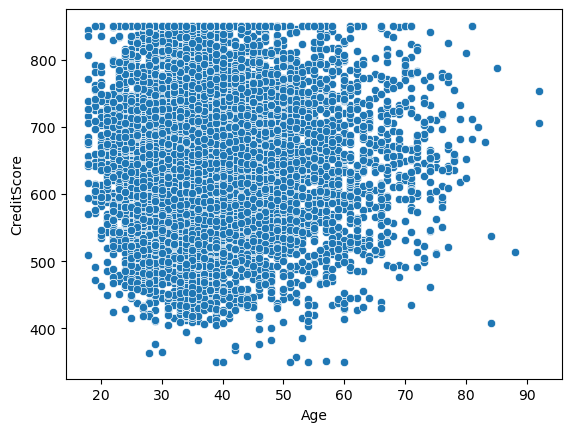

In [10]:
sns.scatterplot(data = churn, x = "Age", y = "CreditScore")

In [11]:
churn_age_cs = churn.groupby("Age")[["CreditScore", "EstimatedSalary"]].mean().reset_index()

In [12]:
churn_age_cs

,Age,CreditScore,EstimatedSalary
0,18,686.681818,85102.389545
1,19,665.629630,97734.100370
2,20,665.050000,97705.542000
3,21,647.283019,102536.673774
4,22,636.547619,98321.615476
...,...,...,...
65,83,678.000000,92934.410000
66,84,472.500000,187360.250000
67,85,787.000000,116537.960000
68,88,513.000000,52952.240000


<Axes: xlabel='Age'>

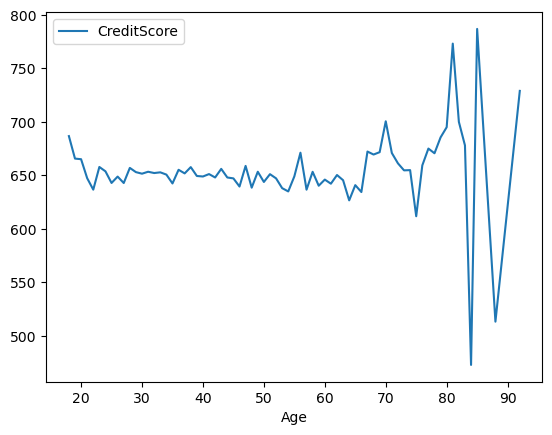

In [13]:
churn_age_cs.plot.line(x = "Age", y = "CreditScore")

<Axes: xlabel='Age'>

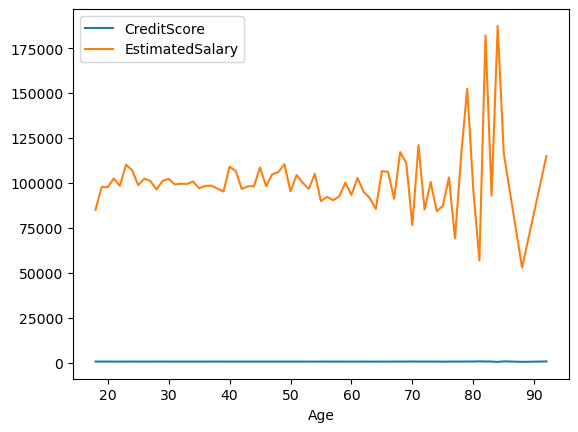

In [14]:
churn_age_cs.plot.line(x = "Age")

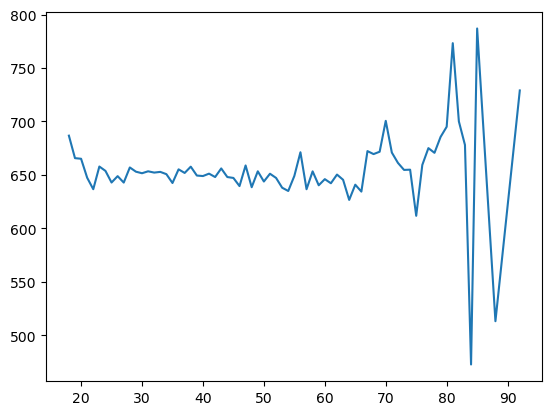

In [15]:
plt.plot(churn_age_cs["Age"], churn_age_cs["CreditScore"])

<Axes: xlabel='Age', ylabel='CreditScore'>

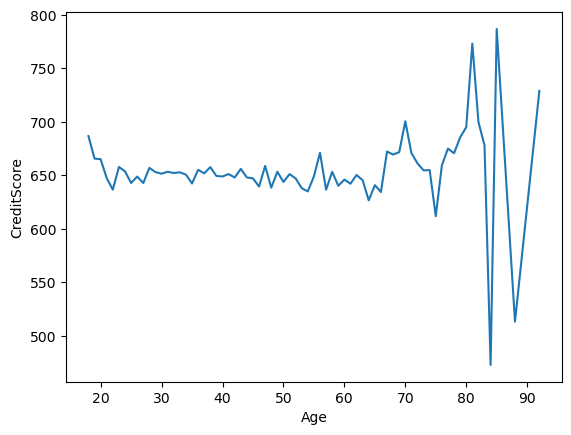

In [16]:
sns.lineplot(data = churn_age_cs, x = "Age", y = "CreditScore")

In [17]:
churn["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [18]:
churn_sal_g = churn.groupby("Gender")[["EstimatedSalary", "CreditScore"]].mean().reset_index()

In [19]:
churn_sal_g

,Gender,EstimatedSalary,CreditScore
0,Female,100601.541382,650.831389
1,Male,99664.576931,650.276892


<Axes: ylabel='Gender'>

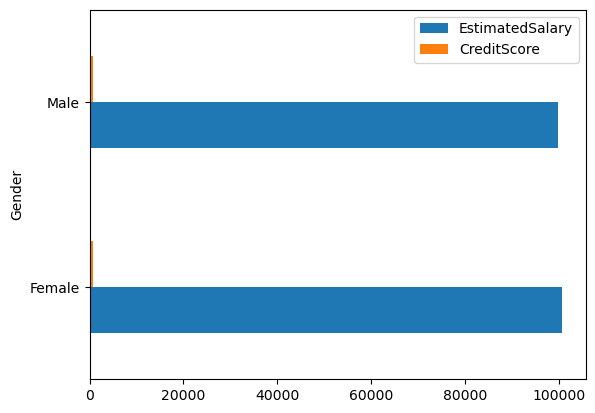

In [20]:
churn_sal_g.plot.barh(x = "Gender")

<BarContainer object of 2 artists>

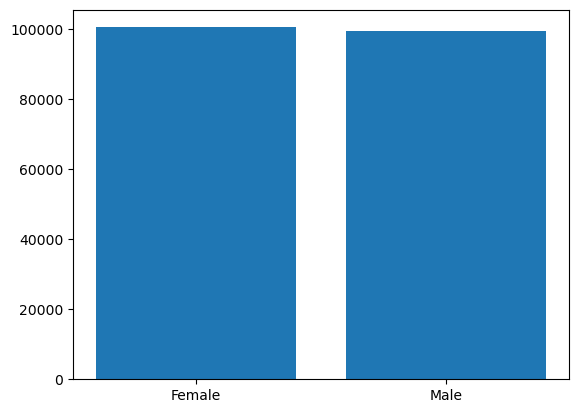

In [21]:
plt.bar(churn_sal_g["Gender"], churn_sal_g["EstimatedSalary"])

<Axes: xlabel='EstimatedSalary', ylabel='Gender'>

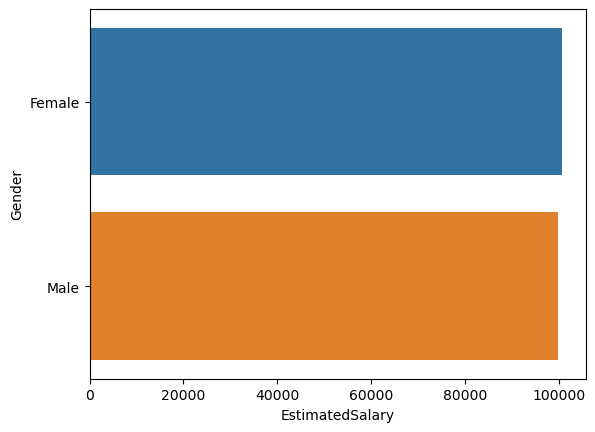

In [22]:
sns.barplot(y = "Gender", x = "EstimatedSalary", data = churn_sal_g, orient="h")

In [23]:
#bar plots only possible for category vs number, shouldn't be possible for numerical data
#We can make histogram of numerical data by using Binning

<Axes: >

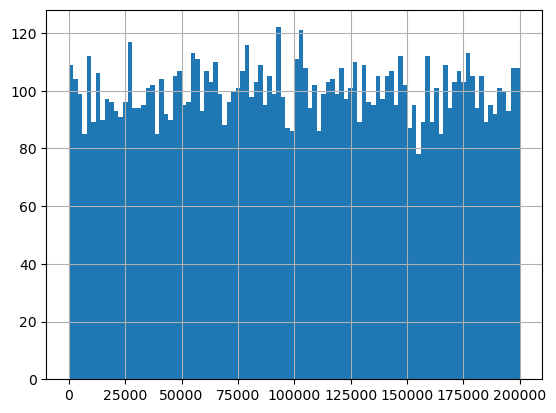

In [24]:
churn["EstimatedSalary"].hist(bins = 100)

In [25]:
churn["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

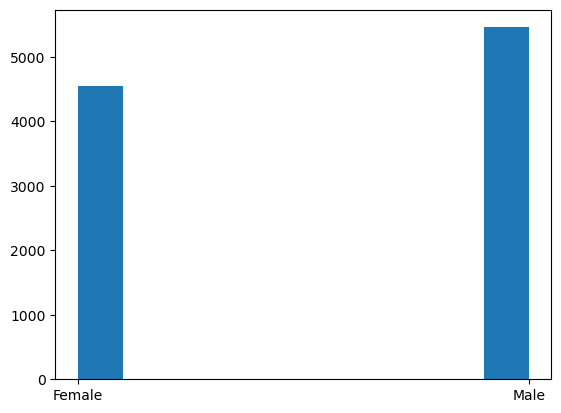

In [26]:
values, x, _ = plt.hist(churn["Gender"])

In [27]:
values

array([4543.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
       5457.])

In [28]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

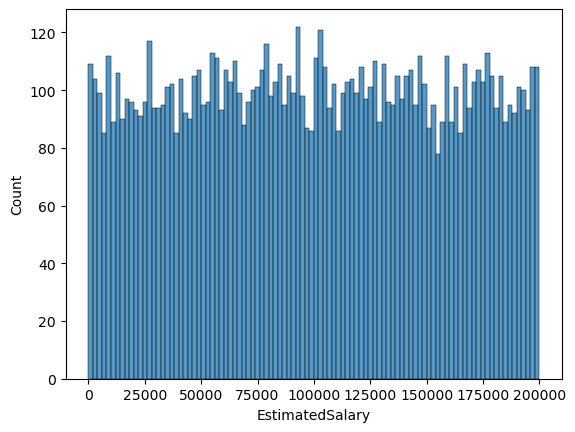

In [29]:
sns.histplot(data = churn, x = "EstimatedSalary", bins = 100)
plt.savefig("hist_plt.svg")

In [30]:
churn["gender_color"] = churn["Gender"].apply(lambda x: "blue" if x == "Male" else "red")

<Axes: xlabel='Age', ylabel='CreditScore'>

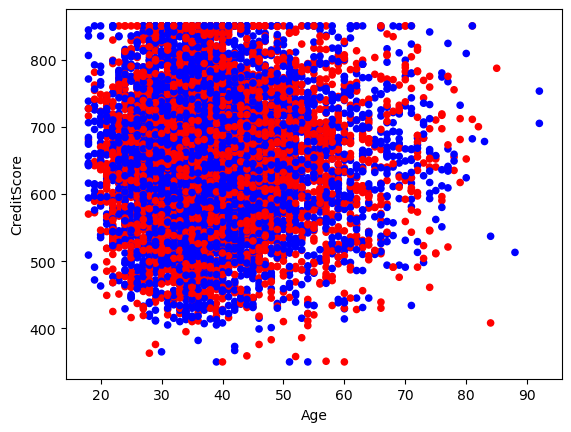

In [31]:
churn.plot.scatter(x = "Age", y = "CreditScore", c = "gender_color")

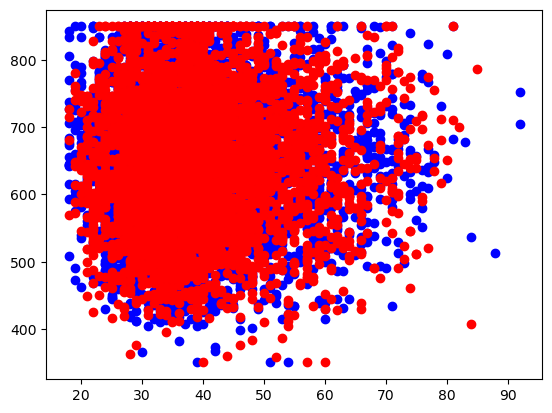

In [32]:
for g in ["Male", "Female"]:
    c = "blue" if g == "Male" else "red"
    g_churn = churn[churn["Gender"] == g]
    plt.scatter(x = g_churn["Age"], y = g_churn["CreditScore"], color = c)

<Axes: xlabel='Age', ylabel='CreditScore'>

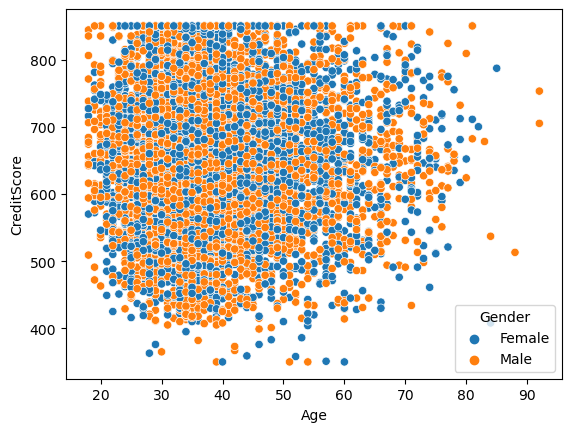

In [33]:
sns.scatterplot(data = churn, x = "Age", y = "CreditScore", hue = "Gender")

<Axes: xlabel='Age', ylabel='CreditScore'>

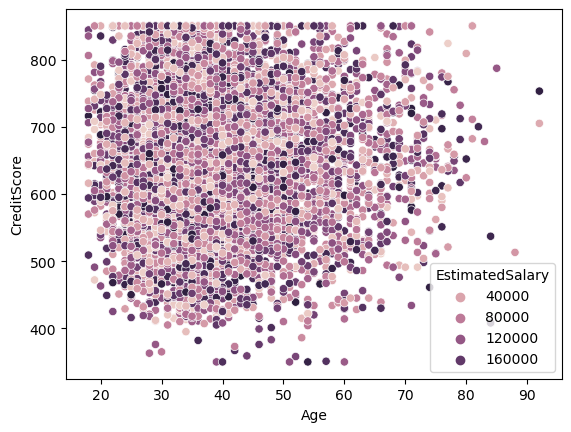

In [34]:
sns.scatterplot(data = churn, x = "Age", y = "CreditScore", hue = "EstimatedSalary")

<Axes: xlabel='Age', ylabel='CreditScore'>

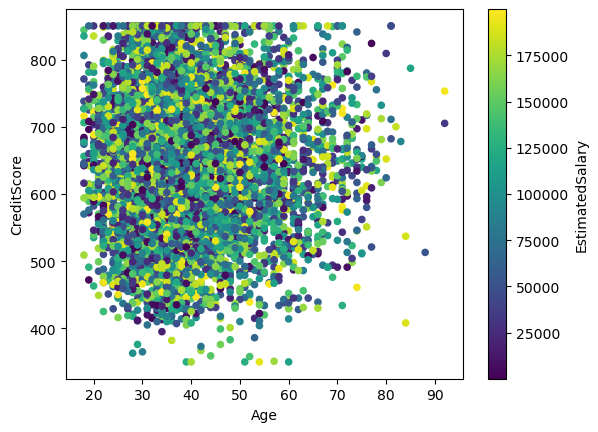

In [35]:
churn.plot.scatter(x = "Age", y = "CreditScore", c = "EstimatedSalary")

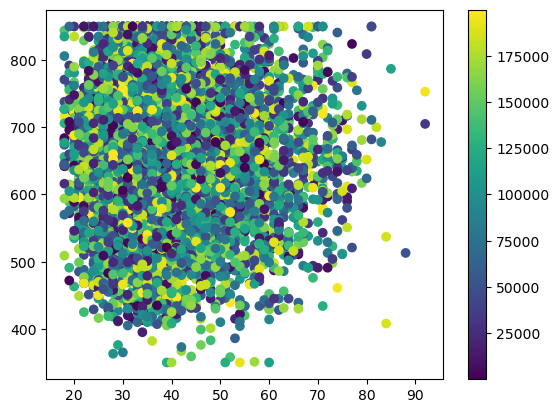

In [36]:
col = plt.scatter(x = churn["Age"], y = churn["CreditScore"], c = churn["EstimatedSalary"])
plt.colorbar(col)

In [37]:
churn_age_cs

,Age,CreditScore,EstimatedSalary
0,18,686.681818,85102.389545
1,19,665.629630,97734.100370
2,20,665.050000,97705.542000
3,21,647.283019,102536.673774
4,22,636.547619,98321.615476
...,...,...,...
65,83,678.000000,92934.410000
66,84,472.500000,187360.250000
67,85,787.000000,116537.960000
68,88,513.000000,52952.240000


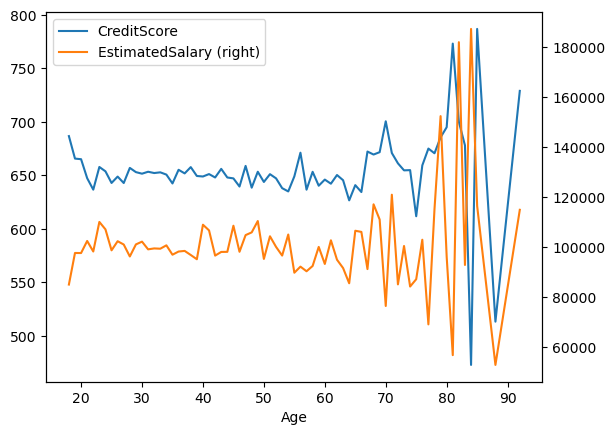

In [38]:
ax = churn_age_cs.plot.line(x = "Age", y = "CreditScore")
ax = churn_age_cs.plot.line(x = "Age", y = "EstimatedSalary", ax = ax, secondary_y = True)

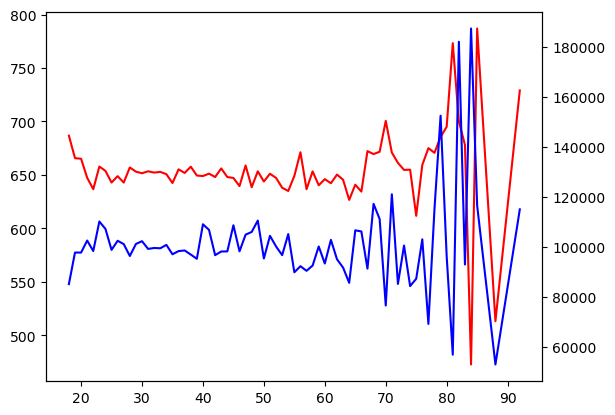

In [39]:
ax = plt.plot(churn_age_cs["Age"], churn_age_cs["CreditScore"], color = "r")
ax2 = plt.twinx()
ax2.plot(churn_age_cs["Age"], churn_age_cs["EstimatedSalary"], color = "b")

In [40]:
churn_age_cs_g = churn.groupby(["Age", "Gender"])[["CreditScore", "EstimatedSalary"]].mean().reset_index()

<Axes: xlabel='Age', ylabel='CreditScore'>

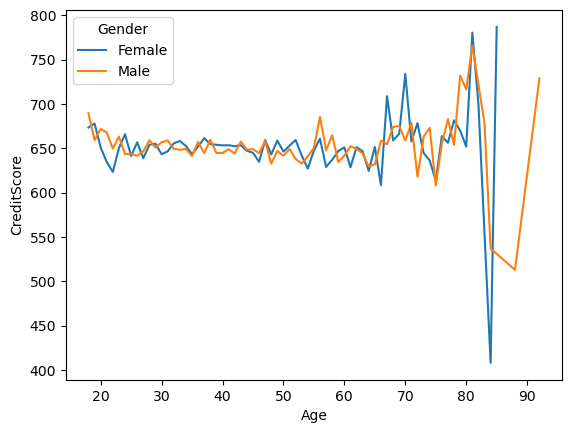

In [41]:
sns.lineplot(data = churn_age_cs_g, x = "Age", y = "CreditScore", hue = "Gender")

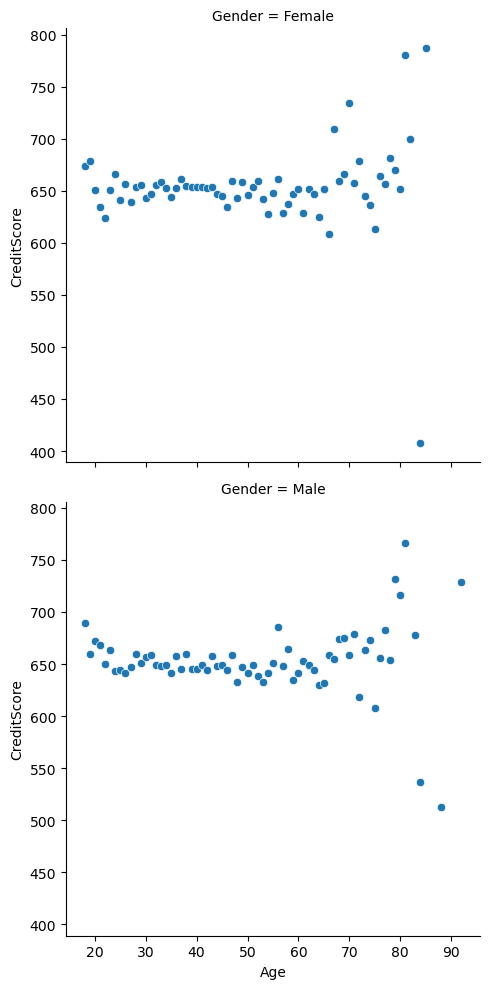

In [42]:
sns.relplot(data = churn_age_cs_g, x = "Age", y = "CreditScore", row = "Gender")

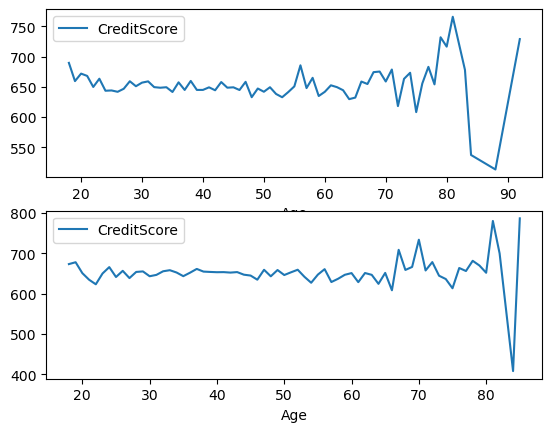

In [43]:
fig, axes = plt.subplots(2, 1)
for i, g in enumerate(["Male", "Female"]):
    churn_age_cs_g[churn_age_cs_g["Gender"] == g].plot.line(x = "Age", y = "CreditScore", ax = axes[i])

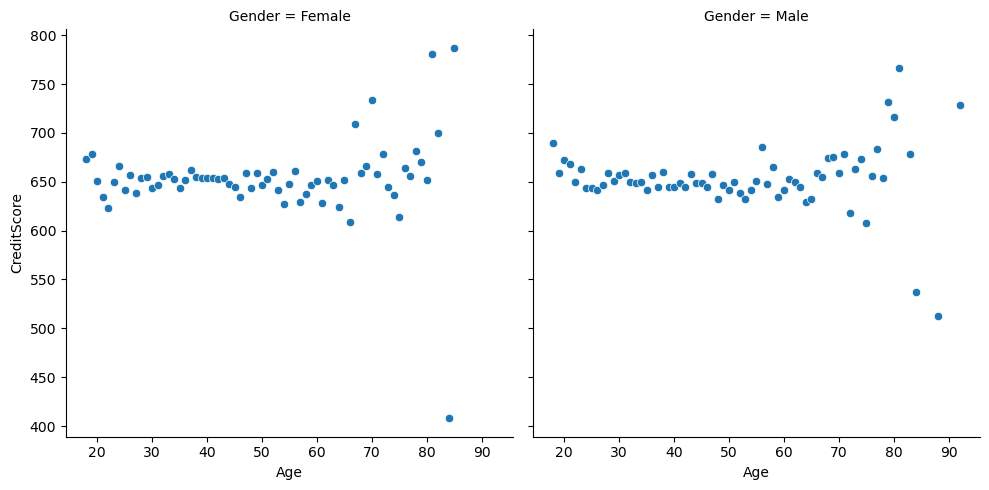

In [44]:
sns.relplot(data = churn_age_cs_g, x = "Age", y = "CreditScore", col = "Gender")

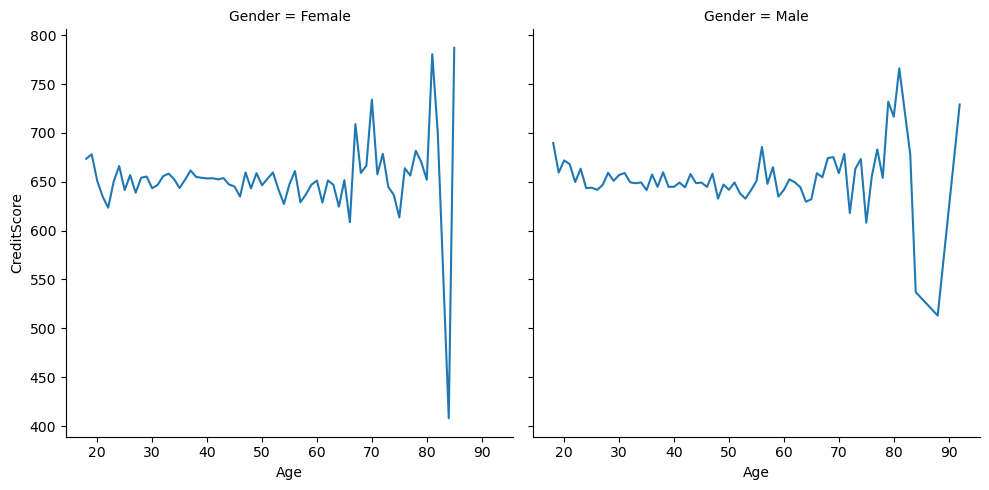

In [45]:
sns.relplot(data = churn_age_cs_g, x = "Age", y = "CreditScore", col = "Gender", kind = "line")

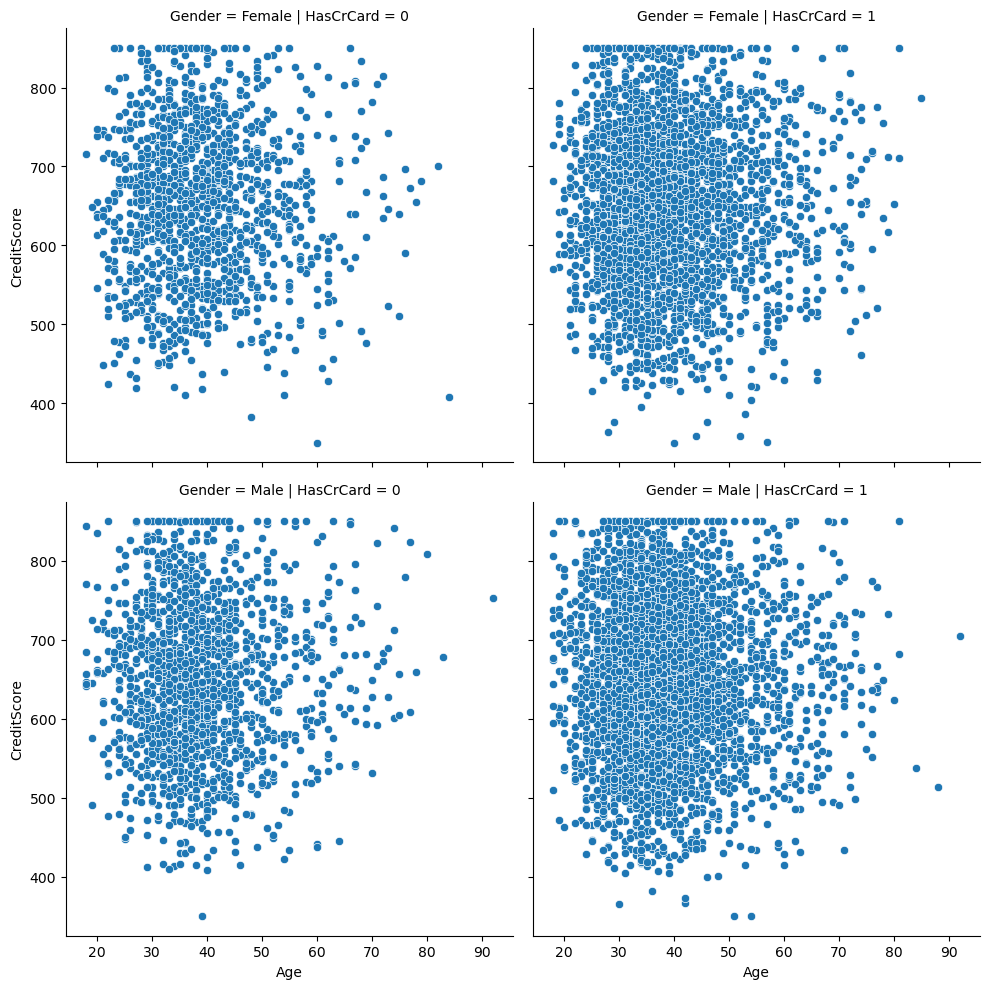

In [46]:
sns.relplot(data = churn, x = "Age", y = "CreditScore", row = "Gender", col = "HasCrCard")

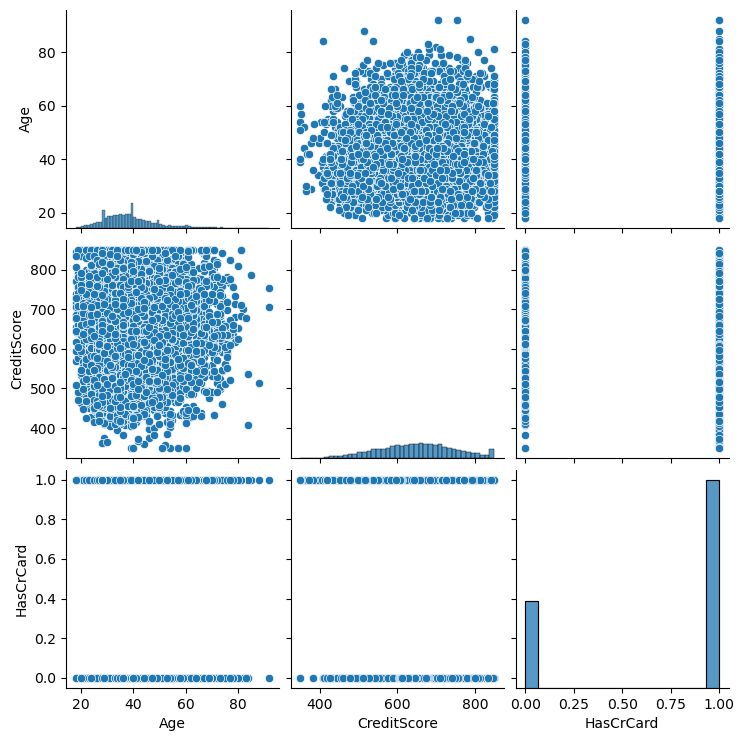

In [47]:
sns.pairplot(data = churn[["Age", "CreditScore", "Gender", "HasCrCard"]])

In [ ]:
sns.pairplot(data = churn)